# Ch05_01.나이브 베이즈(질적자료변환)

## 1.기본 package 설정

In [1]:
## 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기

## 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환
from sklearn import datasets # python 저장 데이터 가져오기

## 3.데이터 전처리
from sklearn.preprocessing import StandardScaler # 연속변수의 표준화
from sklearn.preprocessing import LabelEncoder # 범주형 변수 수치화

# 4. 훈련/검증용 데이터 분리
from sklearn.model_selection import train_test_split 

## 5.분류모델구축 (3장.p.83~130)
# from sklearn.tree import DecisionTreeClassifier # 결정 트리
from sklearn.naive_bayes import GaussianNB # 나이브 베이지안 (실수형)
from sklearn.naive_bayes import MultinomialNB # 나이브 베이지안(정수형)
from sklearn.naive_bayes import BernoulliNB # 나이브 베이지안(바이너리형(0,1))
# from sklearn.neighbors import KNeighborsClassifier # K-최근접 이웃
# from sklearn.ensemble import RandomForestClassifier # 랜덤 포레스트
# from sklearn.ensemble import BaggingClassifier # 앙상블
# from sklearn.linear_model import Perceptron # 퍼셉트론
# from sklearn.linear_model import LogisticRegression # 로지스틱 회귀 모델
# from sklearn.svm import SVC # 서포트 벡터 머신(SVM)
# from sklearn.neural_network import MLPClassifier # 다층인공신경망

## 6.모델검정
from sklearn.metrics import confusion_matrix, classification_report # 정오분류표
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score # 정확도, 민감도 등
from sklearn.metrics import roc_curve, auc # ROC 곡선 그리기

## 7.최적화
from sklearn.model_selection import cross_validate # 교차타당도
from sklearn.pipeline import make_pipeline # 파이프라인 구축
from sklearn.model_selection import learning_curve, validation_curve # 학습곡선, 검증곡선
from sklearn.model_selection import GridSearchCV # 하이퍼파라미터 튜닝

## 2.데이터 가져오기

### 2.1 데이터프레임으로 저장
- 원본데이터(csv)를 dataframe 형태로 가져오기(pandas)

In [2]:
delays_df = pd.read_csv('FlightDelays.csv')
delays_df.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,FlightStatus
0,1455,OH,1455,JFK,184,01/01/2004,5935,BWI,0,THU,1,N940CA,ontime
1,1640,DH,1640,JFK,213,01/01/2004,6155,DCA,0,THU,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,01/01/2004,7208,IAD,0,THU,1,N695BR,ontime
3,1715,DH,1709,LGA,229,01/01/2004,7215,IAD,0,THU,1,N662BR,ontime
4,1039,DH,1035,LGA,229,01/01/2004,7792,IAD,0,THU,1,N698BR,ontime


- 자료구조 살펴보기

In [3]:
delays_df.shape

(2201, 13)

In [4]:
# 자료구조 살펴보기
delays_df.keys()

Index(['CRS_DEP_TIME', 'CARRIER', 'DEP_TIME', 'DEST', 'DISTANCE', 'FL_DATE',
       'FL_NUM', 'ORIGIN', 'Weather', 'DAY_WEEK', 'DAY_OF_MONTH', 'TAIL_NUM',
       'FlightStatus'],
      dtype='object')

### 2.2 data와 target으로 분리
- 필요한 데이터만 추출
- data: X, target: y 로 분리

In [5]:
X=delays_df.iloc[:,[9,0,7,3,1]]
X.head()

,DAY_WEEK,CRS_DEP_TIME,ORIGIN,DEST,CARRIER
0,THU,1455,BWI,JFK,OH
1,THU,1640,DCA,JFK,DH
2,THU,1245,IAD,LGA,DH
3,THU,1715,IAD,LGA,DH
4,THU,1039,IAD,LGA,DH


In [6]:
y=delays_df.iloc[:,[12]]
y.head()

,FlightStatus
0,ontime
1,ontime
2,ontime
3,ontime
4,ontime


## 3.데이터 전처리

### 3.1 data(X) 레이블 인코딩
- 문자형 자료를 숫자(범주형)로 인코딩
- 숫자형 자료를 표준화
- 결정나무, 랜덤 포레스트, 나이브 베이즈 분류 : 원본데이터 그대로 유지

- 출발예정시간변환(18):6 = 6 AM ~ 22 = 10 PM

In [7]:
X['CRS_DEP_TIME']=round(X['CRS_DEP_TIME']/100)

C:\Users\leecho\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
X.head()

,DAY_WEEK,CRS_DEP_TIME,ORIGIN,DEST,CARRIER
0,THU,15.0,BWI,JFK,OH
1,THU,16.0,DCA,JFK,DH
2,THU,12.0,IAD,LGA,DH
3,THU,17.0,IAD,LGA,DH
4,THU,10.0,IAD,LGA,DH


- 출발예정시간을 범주형 변수로 변환

In [9]:
X['CRS_DEP_TIME'] = X['CRS_DEP_TIME'].astype('category')

C:\Users\leecho\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
X.dtypes

DAY_WEEK          object
CRS_DEP_TIME    category
ORIGIN            object
DEST              object
CARRIER           object
dtype: object

- 범주형 변수 : One Hot Encording으로 변환
- 변환기준점 및 변수 확인을 위해 변수 타입을 확인

In [11]:
X.groupby("DAY_WEEK").size()

DAY_WEEK
FRI    391
MON    308
SAT    250
SUN    253
THU    372
TUE    307
WEN    320
dtype: int64

In [12]:
X.groupby("CRS_DEP_TIME").size()

CRS_DEP_TIME
6.0     126
7.0     133
8.0     164
9.0     108
10.0    100
11.0     68
12.0    142
13.0    132
14.0    123
15.0    292
16.0    178
17.0    241
18.0     85
19.0    119
20.0     53
21.0    137
dtype: int64

In [13]:
X.groupby("ORIGIN").size()

ORIGIN
BWI     145
DCA    1370
IAD     686
dtype: int64

In [14]:
X.groupby("DEST").size()

DEST
EWR     665
JFK     386
LGA    1150
dtype: int64

In [15]:
X.groupby("CARRIER").size()

CARRIER
CO     94
DH    551
DL    388
MQ    295
OH     30
RU    408
UA     31
US    404
dtype: int64

- 판다스의 One Hot Encording 기능 사용 - get_dummies
- drip_first = True : 기준변수는 제거함(기준변수는 0,0,0으로 표현가능하며, 다중공선성때문)

In [16]:
X = pd.get_dummies(X[['DAY_WEEK', 'CRS_DEP_TIME', 'ORIGIN', 'DEST', 'CARRIER']], drop_first=True)

In [17]:
X.head()

,DAY_WEEK_MON,DAY_WEEK_SAT,DAY_WEEK_SUN,DAY_WEEK_THU,DAY_WEEK_TUE,DAY_WEEK_WEN,CRS_DEP_TIME_7.0,CRS_DEP_TIME_8.0,CRS_DEP_TIME_9.0,CRS_DEP_TIME_10.0,...,ORIGIN_IAD,DEST_JFK,DEST_LGA,CARRIER_DH,CARRIER_DL,CARRIER_MQ,CARRIER_OH,CARRIER_RU,CARRIER_UA,CARRIER_US
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,1,...,1,0,1,1,0,0,0,0,0,0


### 3.2 Class(target) 레이블 인코딩
- class(y)가 문자형으로 숫자로 변환
- 연착을 중요변수로 설정 
- 정상(1), 연착(0) --> 정상(1), 연착(0)

In [18]:
y = y.replace (['ontime','delayed'], [0,1])
y.head()

,FlightStatus
0,0
1,0
2,0
3,0
4,0


- 분석을 위해서는 데이터 프레임 형태를 배열형태로 변경해야 함

In [19]:
class_le = LabelEncoder()

y = class_le.fit_transform(y)
y

C:\Users\leecho\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## 4.훈련/검증용 데이터 분할
- test_size: 검증데이터 30%
- random_state : random seed 번호 = 1
- stratify : y(클래스)의 비율에 따라 분할

In [20]:
# \ 이후에 space 없어야 함
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, 
                         test_size=0.3, 
                         random_state=1, 
                         stratify=y)

## 5.모델구축
- 실수형: GaussianNB (0.1, 0.9, 1.5)
- 정수형: MultinomialNB (1, 3, 2)
- 바이너리형: BernoulliNB (0,1,0)
- alpha : smoothing

In [21]:
bnb = BernoulliNB(alpha=1.0, class_prior=None, fit_prior=True)
bnb.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

## 6. 모델검정

### 6.1 검증용 데이터로 예측
- predict (class로 표시)
- predict_proba (확률값으로 표시)

In [22]:
y_pred = bnb.predict(X_test)

### 6.2 정오분류표로 검정

In [23]:
confmat = pd.DataFrame(confusion_matrix(y_test, y_pred),
                      index=['True[0]','True[1]'],
                      columns=['Predict[0]', 'Predict[1]'])
confmat

,Predict[0],Predict[1]
True[0],480,52
True[1],107,22


In [24]:
print('Classification Report')
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       532
           1       0.30      0.17      0.22       129

    accuracy                           0.76       661
   macro avg       0.56      0.54      0.54       661
weighted avg       0.72      0.76      0.73       661



### 6.3 정확도, 민감도 확인
- 클래스가 2개일 경우에만 실행

In [25]:
print('잘못 분류된 샘플 개수: %d' % (y_test != y_pred).sum())
print('정확도: %.3f' % accuracy_score(y_test, y_pred))
print('정밀도: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('재현율: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

잘못 분류된 샘플 개수: 159
정확도: 0.759
정밀도: 0.297
재현율: 0.171
F1: 0.217


### 6.4 ROC 곡선 그리기
- decision_function 사용가능한 모델일 경우: tree.decision_function(X_test)
- decision_function 사용이 안되는 모델일 경우:tree.predict_proba(X_test)[:, 1]

In [26]:
# fpr, tpr, thresholds = roc_curve(y_test, bnb.decision_function(X_test))
fpr, tpr, thresholds = roc_curve(y_test, bnb.predict_proba(X_test)[:, 1])

In [27]:
fpr, tpr, thresholds

(array([0.        , 0.0018797 , 0.0037594 , 0.0037594 , 0.0075188 ,
        0.0112782 , 0.01503759, 0.01691729, 0.01879699, 0.01879699,
        0.02631579, 0.02819549, 0.03195489, 0.03383459, 0.03947368,
        0.04323308, 0.04323308, 0.04887218, 0.05263158, 0.05827068,
        0.06390977, 0.06578947, 0.06954887, 0.06954887, 0.07142857,
        0.07894737, 0.08082707, 0.08458647, 0.08646617, 0.08646617,
        0.08646617, 0.09022556, 0.09022556, 0.09398496, 0.09398496,
        0.09586466, 0.09774436, 0.09774436, 0.10526316, 0.10526316,
        0.10714286, 0.10714286, 0.11278195, 0.11278195, 0.11842105,
        0.12218045, 0.12406015, 0.12406015, 0.13157895, 0.13345865,
        0.13721805, 0.14473684, 0.14849624, 0.15601504, 0.15789474,
        0.16917293, 0.17293233, 0.17669173, 0.18045113, 0.18421053,
        0.18421053, 0.18796992, 0.19548872, 0.20112782, 0.20300752,
        0.20676692, 0.21240602, 0.21240602, 0.21616541, 0.21616541,
        0.22180451, 0.22932331, 0.23684211, 0.24

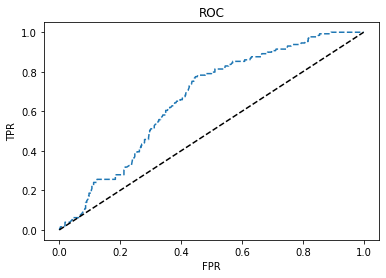

In [28]:
plt.plot(fpr, tpr, '--', label="Decision Tree")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.plot([fpr], [tpr], 'r-', ms=10)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

## 부록. 예측

- 1~6: DAY_WEEK(FRI, MON, SAT, SUN, THU, TUE, WEN) = FRI(0,0,0,0,0,0), MON=(1,0,0,0,0,0)
- 7~21: CRS_DEP_TIME: 6 ~ 21(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
- 22~23: ORIGIN(BWI, DCA, IAD)(0,0)
- 24~25: DEST(EWR, JFK, LGA)(0,0)
- 26~32: CARRIER(CO, DH, DL, MQ, OH, RU, UA, US)

x_new = (FRI, 6, BWI, EWR, CO)

In [29]:
x_new = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
bnb.predict_proba([x_new])

array([[0.76674036, 0.23325964]])

In [30]:
x_new = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
bnb.predict([x_new])

array([0], dtype=int64)

## 7.최적화
- 교재 6장 (pp.218~250)

### 7.1 교차검정
- 5장, 6장의 default model 정확도= 0.758 과 비교
- 7.3부터 최적화를 위해서 교차검정 방법을 사용

In [31]:
scores = cross_validate(estimator=bnb, 
                        X=X_train, 
                        y=y_train, 
                        scoring=['accuracy'], 
                        cv=10, 
                        n_jobs=-1,
                        return_train_score=False)
print('CV 정확도 점수: %s' % scores['test_accuracy'])
print('CV 정확도: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']), 
                                 np.std(scores['test_accuracy'])))

CV 정확도 점수: [0.8        0.76623377 0.76623377 0.81818182 0.77272727 0.77272727
 0.75974026 0.76623377 0.78571429 0.77777778]
CV 정확도: 0.779 +/- 0.017


### 7.2 파이프라인 모델 만들기
- 파이프라인을 이용하여 최적 모델 만들기
- 기본모형은 아무 옵션이 없는 모델로 부터 시작
- 파라미터 옵션 확인: pipe_tree.get_params().keys()

In [32]:
pipe_bnb = make_pipeline(BernoulliNB())

In [33]:
pipe_bnb.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'bernoullinb', 'bernoullinb__alpha', 'bernoullinb__binarize', 'bernoullinb__class_prior', 'bernoullinb__fit_prior'])

### 7.3 학습 곡선으로 편향과 분산 문제 분석하기
- 훈렴 샘플링 수를 이용하여 편향과 분산 검정
- 편향: 정확도가 높은지 검정
- 분산: 훈련/검정 데이터의 정확도의 차이가 적은지

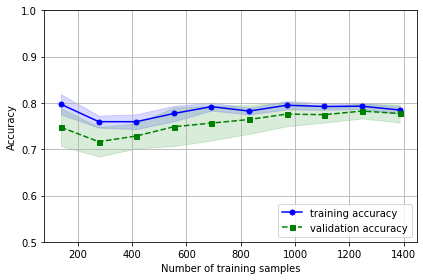

In [34]:
train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_bnb, # 수정
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.0])  # 수정
plt.tight_layout()
plt.show()

### 7.4 검증 곡선으로 과대적합과 과소적합 조사하기
- 과대적합 : 파라미터가 많음 -> 파라미터 축소
- 과소적합 : 파라미터가 적음 -> 파라미터 추가

### 7.5 하이퍼파라미터 튜닝
- 그리드 서치를 사용한 머신 러닝 모델 세부 튜닝
- 기계학습 모델의 성능을 결정하는 하이퍼 파라미터 튜닝

## 8.최적화 모델 검정